In [1]:
#import packages 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

#import more packages
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv('INTL_LOG_REG_UPSELL_1.csv',encoding='latin-1')

In [3]:
#drop complicating variables
df= df.drop(['Number of Emails Before Response'], axis=1)
df= df.drop(['Gap between Close Date and Go Live Date'], axis=1)
df= df.drop(['Lead Source'], axis=1)
df= df.drop(['ï»¿Account Name'], axis=1)
df= df.drop(['Opportunity Name'], axis=1)
df= df.drop(['Account ID 18'], axis=1)
df= df.drop(['Opportunity ID 18'], axis=1)
df= df.drop(['Contact: Title'], axis=1)
df= df.drop(['Implementation Package'], axis=1)
df= df.drop(['Primary LMS'], axis=1)
df= df.drop(['Primary SIS'], axis=1)
df= df.drop(['Org Type'], axis=1)
df= df.drop(['Customer Success Region'], axis=1)
df= df.drop(['Email Opt Out'], axis=1)
df= df.drop(['Type'], axis=1)

In [4]:
#perform imputation for nulls (If there is symmetry in the dataset, use the mean. If the dataset is skewed use the median. Use the mode with qualitative variables.)
df['Account FTE/Users'].fillna(df['Account FTE/Users'].mean(), inplace=True)
df['Department Source'].fillna(df['Department Source'].mode()[0], inplace=True)
df['Product Type'].fillna(df['Product Type'].mode()[0], inplace=True)
df['Inbound/Outbound Source'].fillna(df['Inbound/Outbound Source'].mode()[0], inplace=True)
df['Days Since Last Activity'].fillna(df['Days Since Last Activity'].mean(), inplace=True)
df['FFT Teachers Active'].fillna(df['FFT Teachers Active'].median(), inplace=True)
df['FFT Students Active'].fillna(df['FFT Students Active'].median(), inplace=True)
df['FFT Observers Active'].fillna(df['FFT Observers Active'].median(), inplace=True)
df['FFT Courses Active'].fillna(df['FFT Courses Active'].median(), inplace=True)

<AxesSubplot:>

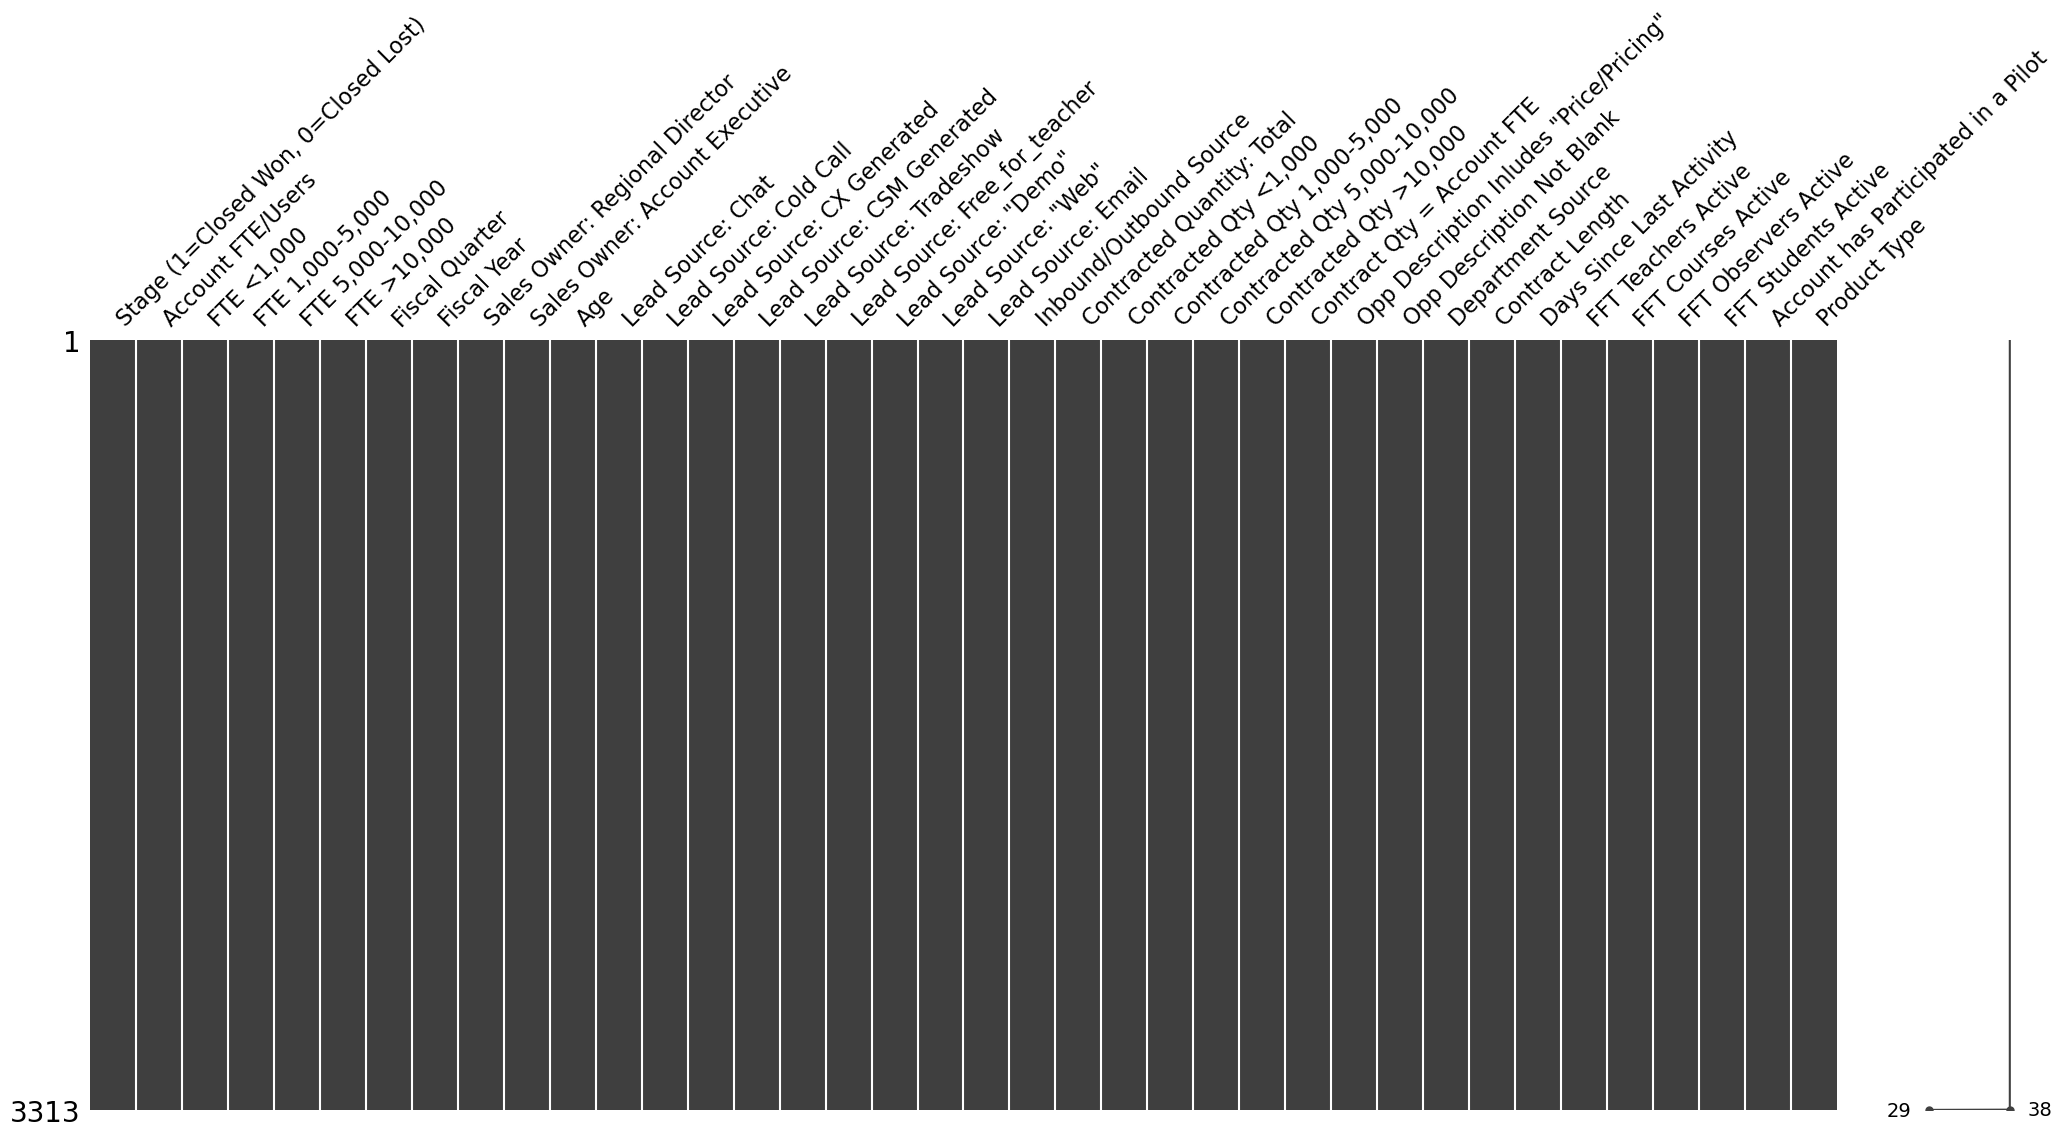

In [5]:
import missingno as msno
msno.matrix(df)

In [6]:
df.dtypes

Stage (1=Closed Won, 0=Closed Lost)          int64
Account FTE/Users                          float64
FTE <1,000                                   int64
FTE 1,000-5,000                              int64
FTE 5,000-10,000                             int64
FTE >10,000                                  int64
Fiscal Quarter                              object
Fiscal Year                                  int64
Sales Owner: Regional Director               int64
Sales Owner: Account Executive               int64
Age                                          int64
Lead Source: Chat                          float64
Lead Source: Cold Call                     float64
Lead Source: CX Generated                  float64
Lead Source: CSM Generated                 float64
Lead Source: Tradeshow                     float64
Lead Source: Free_for_teacher              float64
Lead Source: "Demo"                        float64
Lead Source: "Web"                         float64
Lead Source: Email             

In [7]:
# create dummy variables 
dummies= pd.get_dummies(df[["Fiscal Quarter","Inbound/Outbound Source","Department Source","Product Type"]])
df = pd.concat([df, dummies], axis=1)

In [8]:
#drop original dummy variables
df = df.drop(['Fiscal Quarter'], axis=1)
df = df.drop(['Inbound/Outbound Source'], axis=1)
df = df.drop(['Department Source'], axis=1)
df = df.drop(['Product Type'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      3313 non-null   int64  
 1   Account FTE/Users                        3313 non-null   float64
 2   FTE <1,000                               3313 non-null   int64  
 3   FTE 1,000-5,000                          3313 non-null   int64  
 4   FTE 5,000-10,000                         3313 non-null   int64  
 5   FTE >10,000                              3313 non-null   int64  
 6   Fiscal Year                              3313 non-null   int64  
 7   Sales Owner: Regional Director           3313 non-null   int64  
 8   Sales Owner: Account Executive           3313 non-null   int64  
 9   Age                                      3313 non-null   int64  
 10  Lead Source: Chat                        3313 no

In [10]:
#perform imputation for nulls (If there is symmetry in the dataset, use the mean. If the dataset is skewed use the median. Use the mode with qualitative variables.)
df['Lead Source: Chat'].fillna(df['Lead Source: Chat'].mode()[0], inplace=True)
df['Lead Source: Cold Call'].fillna(df['Lead Source: Cold Call'].mode()[0], inplace=True)
df['Lead Source: CX Generated'].fillna(df['Lead Source: CX Generated'].mode()[0], inplace=True)
df['Lead Source: CSM Generated'].fillna(df['Lead Source: CSM Generated'].mode()[0], inplace=True)
df['Lead Source: Tradeshow'].fillna(df['Lead Source: Tradeshow'].mode()[0], inplace=True)
df['Lead Source: Free_for_teacher'].fillna(df['Lead Source: Free_for_teacher'].mode()[0], inplace=True)
df['Lead Source: "Demo"'].fillna(df['Lead Source: "Demo"'].mode()[0], inplace=True)
df['Lead Source: "Web"'].fillna(df['Lead Source: "Web"'].mode()[0], inplace=True)
df['Lead Source: Email'].fillna(df['Lead Source: Email'].mode()[0], inplace=True)

In [12]:
#drop k-1 dummy variables
df = df.drop(['Department Source_Partner Generated'], axis=1)
df = df.drop(['Product Type_Subscription Add-ons'], axis=1)
df = df.drop(['Opp Description Not Blank'], axis=1)
df = df.drop(['Fiscal Quarter_Q1'], axis=1)
df = df.drop(['Fiscal Year'], axis=1)

In [13]:
# transform variables
df['Fiscal Quarter_Q2'] = df['Fiscal Quarter_Q2'].astype(float)
df['Fiscal Quarter_Q3'] = df['Fiscal Quarter_Q3'].astype(float)
df['Fiscal Quarter_Q4'] = df['Fiscal Quarter_Q4'].astype(float)
df['Inbound/Outbound Source_Outbound'] = df['Inbound/Outbound Source_Outbound'].astype(float)
df['Department Source_CS Generated'] = df['Department Source_CS Generated'].astype(float)
df['Department Source_CX Generated'] = df['Department Source_CX Generated'].astype(float)
df['Department Source_Channel Generated'] = df['Department Source_Channel Generated'].astype(float)
df['Department Source_Marketing Generated'] = df['Department Source_Marketing Generated'].astype(float)
df['Department Source_Sales Generated'] = df['Department Source_Sales Generated'].astype(float)
df['Product Type_Cloud SaaS Subscription'] = df['Product Type_Cloud SaaS Subscription'].astype(float)
df['Product Type_Custom Development'] = df['Product Type_Custom Development'].astype(float)
df['Product Type_Implementation'] = df['Product Type_Implementation'].astype(float)
df['Product Type_Pilot'] = df['Product Type_Pilot'].astype(float)
df['Product Type_Support'] = df['Product Type_Support'].astype(float)
df['Product Type_Training'] = df['Product Type_Training'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      3313 non-null   int64  
 1   Account FTE/Users                        3313 non-null   float64
 2   FTE <1,000                               3313 non-null   int64  
 3   FTE 1,000-5,000                          3313 non-null   int64  
 4   FTE 5,000-10,000                         3313 non-null   int64  
 5   FTE >10,000                              3313 non-null   int64  
 6   Sales Owner: Regional Director           3313 non-null   int64  
 7   Sales Owner: Account Executive           3313 non-null   int64  
 8   Age                                      3313 non-null   int64  
 9   Lead Source: Chat                        3313 non-null   float64
 10  Lead Source: Cold Call                   3313 no

In [15]:
df = df.drop(['Contract Length'], axis=1)

In [16]:
# Calculate the required sample size
N = 10 k / p
1,245=(10*64) / .5137

SyntaxError: invalid syntax (2914306141.py, line 2)

In [20]:
#import packages for log regression
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [21]:
#perform logistic regression
x= df.drop('Stage (1=Closed Won, 0=Closed Lost)', axis =1)
y= df['Stage (1=Closed Won, 0=Closed Lost)']

In [22]:
model = LogisticRegression(solver= 'liblinear' , random_state=0)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Stage (1=Closed Won, 0=Closed Lost)   R-squared:                       0.189
Model:                                             OLS   Adj. R-squared:                  0.177
Method:                                  Least Squares   F-statistic:                     15.80
Date:                                 Mon, 19 Dec 2022   Prob (F-statistic):          7.02e-114
Time:                                         09:33:46   Log-Likelihood:                -1765.9
No. Observations:                                 3313   AIC:                             3630.
Df Residuals:                                     3264   BIC:                             3929.
Df Model:                                           48                                         
Covariance Type:                             nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Account FTE/Users                       -1.887e-08   6.12e-08     -0.308      0.758   -1.39e-07    1.01e-07
FTE <1,000                                 -0.2073      0.033     -6.273      0.000      -0.272      -0.143
FTE 1,000-5,000                            -0.2291      0.033     -6.929      0.000      -0.294      -0.164
FTE 5,000-10,000                           -0.1733      0.038     -4.580      0.000      -0.248      -0.099
FTE >10,000                                -0.1887      0.033     -5.802      0.000      -0.253      -0.125
Sales Owner: Regional Director             -0.0125      0.019     -0.666      0.505      -0.049       0.024
Sales Owner: Account Executive             -0.0371      0.024     -1.548      0.122      -0.084       0.010
Age                                        -0.0011   6.07e-05    -18.784      0.000      -0.001      -0.001
Lead Source: Chat                           0.2645      0.241      1.099      0.272      -0.207       0.736
Lead Source: Cold Call                  -1.106e-11    2.1e-11     -0.527      0.598   -5.22e-11    3.01e-11
Lead Source: CX Generated                   0.2045      0.075      2.727      0.006       0.057       0.352
Lead Source: CSM Generated                 -0.1598      0.029     -5.590      0.000      -0.216      -0.104
Lead Source: Tradeshow                      0.0949      0.036      2.623      0.009       0.024       0.166
Lead Source: Free_for_teacher               0.0650      0.068      0.953      0.341      -0.069       0.199
Lead Source: "Demo"                         0.0940      0.081      1.162      0.245      -0.065       0.253
Lead Source: "Web"                          0.0195      0.033      0.592      0.554      -0.045       0.084
Lead Source: Email                         -0.0552      0.078     -0.710      0.478      -0.207       0.097
Contracted Quantity: Total                7.77e-07   9.71e-07      0.800      0.424   -1.13e-06    2.68e-06
Contracted Qty <1,000                       0.4443      0.055      8.059      0.000       0.336       0.552
Contracted Qty 1,000-5,000                  0.4097      0.059      7.002      0.000       0.295       0.524
Contracted Qty 5,000-10,000                 0.4142      0.065      6.333      0.000       0.286       0.542
Contracted Qty >10,000                      0.3482      0.067      5.233      0.000       0.218       0.479
Contract Qty = Account FTE                 -0.0049      0.037     -0.132      0.895      -0.077       0.067
Opp Description Inludes "Price/Pricing"    -0.0854      0.037     -2.332      0.020     

In [25]:
#create new data frame with statistically significant pvalues
df = df[['FTE 1,000-5,000',
        'FTE >10,000',
        'Age',
        'Lead Source: CX Generated',
        'Lead Source: CSM Generated',
        'Lead Source: Tradeshow',
        'Contracted Qty 1,000-5,000',
        'Contracted Qty 5,000-10,000',
        'Contracted Qty >10,000',
        'Opp Description Inludes "Price/Pricing"',
        'Account has Participated in a Pilot',
        'Fiscal Quarter_Q2', 
        'Fiscal Quarter_Q4',
        'Inbound/Outbound Source_Inbound',   
        'Inbound/Outbound Source_Outbound',  
        'Department Source_Marketing Generated', 
        'Product Type_Change Strategy',
        'Product Type_Custom Development',
        'Product Type_Implementation',
        'Stage (1=Closed Won, 0=Closed Lost)']]


In [26]:
# find VIF  
df_before = df

X1 = sm.tools.add_constant(df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                      0.000000
FTE 1,000-5,000                            1.274797
FTE >10,000                                1.408772
Age                                        1.245634
Lead Source: CX Generated                  1.044992
Lead Source: CSM Generated                 1.044066
Lead Source: Tradeshow                     1.025968
Contracted Qty 1,000-5,000                 1.058010
Contracted Qty 5,000-10,000                1.033948
Contracted Qty >10,000                     1.108090
Opp Description Inludes "Price/Pricing"    1.045224
Account has Participated in a Pilot        1.103935
Fiscal Quarter_Q2                          1.185218
Fiscal Quarter_Q4                          1.174969
Inbound/Outbound Source_Inbound                 inf
Inbound/Outbound Source_Outbound                inf
Department Source_Marketing Generated      1.128783
Product Type_Change Strategy               1.004096
Product Type_Custom Development            1.049796
Product Type

In [27]:
#drop Outbound
df_after = df.drop(['Inbound/Outbound Source_Outbound'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA AFTER
----------------------------------------------------------------------------------------------------


const                                      8.477376
FTE 1,000-5,000                            1.274797
FTE >10,000                                1.408772
Age                                        1.245634
Lead Source: CX Generated                  1.044992
Lead Source: CSM Generated                 1.044066
Lead Source: Tradeshow                     1.025968
Contracted Qty 1,000-5,000                 1.058010
Contracted Qty 5,000-10,000                1.033948
Contracted Qty >10,000                     1.108090
Opp Description Inludes "Price/Pricing"    1.045224
Account has Participated in a Pilot        1.103935
Fiscal Quarter_Q2                          1.185218
Fiscal Quarter_Q4                          1.174969
Inbound/Outbound Source_Inbound            1.123521
Department Source_Marketing Generated      1.128783
Product Type_Change Strategy               1.004096
Product Type_Custom Development            1.049796
Product Type_Implementation                1.032608
Stage (1=Clo

In [28]:
#perform logistic regression
x= df_after.drop('Stage (1=Closed Won, 0=Closed Lost)', axis =1)
y= df_after['Stage (1=Closed Won, 0=Closed Lost)']

In [29]:
model = LogisticRegression(solver= 'liblinear' , random_state=0)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Stage (1=Closed Won, 0=Closed Lost)   R-squared (uncentered):                   0.557
Model:                                             OLS   Adj. R-squared (uncentered):              0.555
Method:                                  Least Squares   F-statistic:                              230.2
Date:                                 Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                                         09:38:50   Log-Likelihood:                         -2764.0
No. Observations:                                 3313   AIC:                                      5564.
Df Residuals:                                     3295   BIC:                                      5674.
Df Model:                                           18                                                  
Covariance Type:                             nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
FTE 1,000-5,000                             0.3641      0.023     15.888      0.000       0.319       0.409
FTE >10,000                                 0.3738      0.021     17.646      0.000       0.332       0.415
Age                                        -0.0006   7.93e-05     -7.756      0.000      -0.001      -0.000
Lead Source: CX Generated                   0.3088      0.056      5.551      0.000       0.200       0.418
Lead Source: CSM Generated                  0.2116      0.031      6.927      0.000       0.152       0.272
Lead Source: Tradeshow                      0.2060      0.047      4.356      0.000       0.113       0.299
Contracted Qty 1,000-5,000                  0.1390      0.031      4.439      0.000       0.078       0.200
Contracted Qty 5,000-10,000                 0.1164      0.059      1.983      0.047       0.001       0.232
Contracted Qty >10,000                     -0.0827      0.051     -1.607      0.108      -0.184       0.018
Opp Description Inludes "Price/Pricing"    -0.0405      0.049     -0.830      0.406      -0.136       0.055
Account has Participated in a Pilot         0.0881      0.028      3.179      0.001       0.034       0.142
Fiscal Quarter_Q2                           0.4535      0.020     22.361      0.000       0.414       0.493
Fiscal Quarter_Q4                           0.4123      0.022     18.647      0.000       0.369       0.456
Inbound/Outbound Source_Inbound             0.3024      0.041      7.438      0.000       0.223       0.382
Department Source_Marketing Generated      -0.1967      0.066     -2.986      0.003      -0.326      -0.068
Product Type_Change Strategy               -0.2563      0.280     -0.915      0.360      -0.805       0.293
Product Type_Custom Development            -0.0492      0.049     -1.010      0.313      -0.145       0.046
Product Type_Implementation                 0.2294      0.029      7.880      0.000       0.172       0.286
==============================================================================
Omnibus:                      211.349   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.528
Skew:                          -0.417   Prob(JB):                     2.06e-33
Kurtosis:                       2.371   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentere